In [1]:
#Imports 


%matplotlib inline
import pandas as pd
import numpy as np
import scipy.stats as stats
import statsmodels.api as sm
import statsmodels.formula.api as smf
import matplotlib.pyplot as plt
import seaborn as sns
from patsy import dmatrices
from statsmodels.stats.outliers_influence import variance_inflation_factor
import statsmodels.stats.api as sms
from statsmodels.compat import lzip



In [2]:
#Read the data

data = pd.read_csv('analysis-8.csv', sep=",")

In [3]:
#Check the data

data.head()

,Country,ACI_Total,GDP_per_capita,Unemployment_total,Literacy_total,WHI,Life_expectancy,Depression_rate,Suicide_rate
0,Angola,6.94,2524.94,7.42,66.0,3.80,61.0,3.6,6.1
1,Albania,7.17,5287.66,12.30,98.1,4.59,79.0,4.8,4.3
2,Argentina,9.65,11795.16,9.22,99.0,6.39,77.0,4.7,8.4
3,Armenia,5.55,4220.54,18.97,99.8,4.32,75.0,5.0,3.3
4,Australia,10.51,57180.78,5.30,99.0,7.27,83.0,6.2,12.5


In [4]:
#Describe the data

data.describe()

,ACI_Total,GDP_per_capita,Unemployment_total,Literacy_total,WHI,Life_expectancy,Depression_rate,Suicide_rate
count,116.000000,116.000000,116.000000,116.000000,116.000000,116.000000,116.000000,116.000000
mean,7.559224,17444.304914,6.527759,87.918707,5.463707,73.301724,4.870690,10.525862
std,3.530846,22784.474988,5.086158,16.895218,1.170063,7.724855,0.911856,8.080186
min,0.430000,238.030000,0.140000,22.300000,2.910000,54.000000,3.200000,2.100000
25%,4.737500,2010.500000,3.655000,80.725000,4.437500,67.750000,4.200000,5.975000
50%,7.500000,7275.675000,5.000000,95.950000,5.480000,75.000000,4.700000,8.800000
75%,10.735000,23152.605000,7.412500,99.000000,6.350000,80.000000,5.600000,12.925000
max,15.090000,117254.740000,26.910000,100.000000,7.630000,85.000000,7.400000,72.400000


In [5]:
# Fit the model

model2 = smf.ols("ACI_Total ~ GDP_per_capita + Unemployment_total + WHI + Literacy_total + Life_expectancy + Depression_rate", data).fit()
print(model2.summary())

                            OLS Regression Results                            
Dep. Variable:              ACI_Total   R-squared:                       0.529
Model:                            OLS   Adj. R-squared:                  0.503
Method:                 Least Squares   F-statistic:                     20.37
Date:                Tue, 10 Jan 2023   Prob (F-statistic):           7.17e-16
Time:                        19:13:17   Log-Likelihood:                -266.81
No. Observations:                 116   AIC:                             547.6
Df Residuals:                     109   BIC:                             566.9
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
Intercept             -1.1185      3

In [6]:
model2 = smf.ols("ACI_Total ~ GDP_per_capita + Unemployment_total + WHI + Literacy_total + Life_expectancy + Depression_rate", data).fit(cov_type='HC3')
print(model2.summary())

                            OLS Regression Results                            
Dep. Variable:              ACI_Total   R-squared:                       0.529
Model:                            OLS   Adj. R-squared:                  0.503
Method:                 Least Squares   F-statistic:                     26.05
Date:                Tue, 10 Jan 2023   Prob (F-statistic):           4.91e-19
Time:                        19:13:17   Log-Likelihood:                -266.81
No. Observations:                 116   AIC:                             547.6
Df Residuals:                     109   BIC:                             566.9
Df Model:                           6                                         
Covariance Type:                  HC3                                         
                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------
Intercept             -1.1185      3

Text(0.5, 1.0, 'Multiple Model Residuals Q-Q Plot')

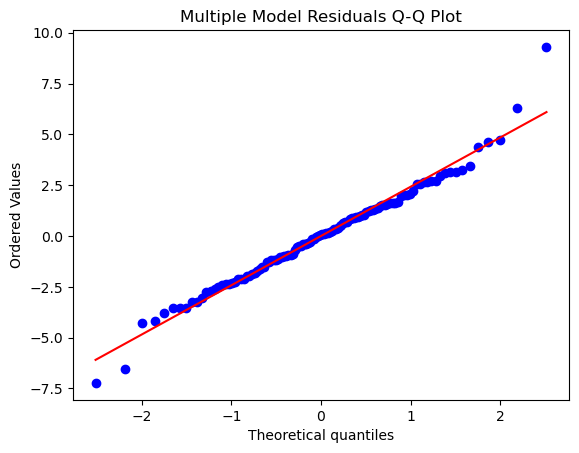

In [7]:
# Check the assumptions

#Residuals are normally distributed

stats.probplot(model2.resid, dist="norm", plot= plt)
plt.title("Multiple Model Residuals Q-Q Plot")

In [8]:
# Check the assumptions

#No Multicollinearity 'VIF'


y, X = dmatrices('ACI_Total ~  GDP_per_capita + Unemployment_total + WHI + Literacy_total + Life_expectancy + Depression_rate', data=data, return_type='dataframe')

vif = pd.DataFrame()
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['variable'] = X.columns

vif

,VIF,variable
0,187.482765,Intercept
1,2.445128,GDP_per_capita
2,1.148313,Unemployment_total
3,3.497193,WHI
4,3.100534,Literacy_total
5,4.733874,Life_expectancy
6,1.500641,Depression_rate


In [9]:
data = pd.read_csv('analysis-7.csv', sep=",")

data.corr()

,ACI_Total,GDP_per_capita,Unemployment_total,Literacy_total,WHI,Life_expectancy,Depression_rate
ACI_Total,1.000000,0.441792,0.057279,0.485597,0.393776,0.432511,0.674689
GDP_per_capita,0.441792,1.000000,-0.093697,0.419191,0.734150,0.669003,0.374836
Unemployment_total,0.057279,-0.093697,1.000000,0.185429,-0.088507,-0.028880,0.152356
Literacy_total,0.485597,0.419191,0.185429,1.000000,0.610040,0.769895,0.533749
WHI,0.393776,0.734150,-0.088507,0.610040,1.000000,0.796385,0.387122
Life_expectancy,0.432511,0.669003,-0.028880,0.769895,0.796385,1.000000,0.484216
Depression_rate,0.674689,0.374836,0.152356,0.533749,0.387122,0.484216,1.000000


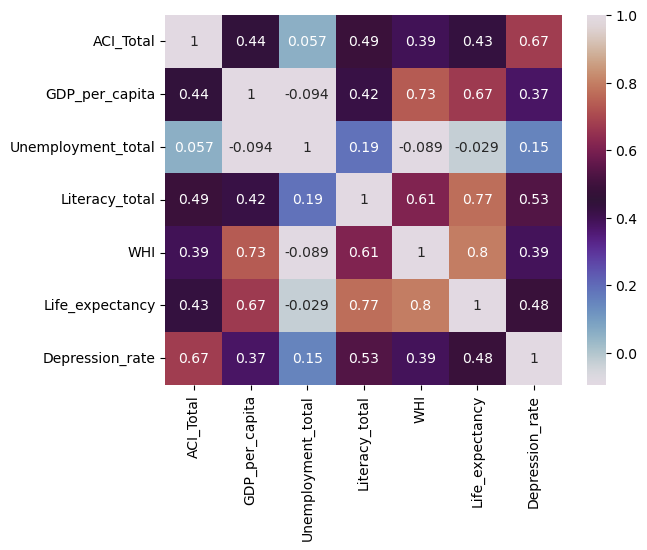

In [10]:
corr = data.corr()
sns.heatmap(corr, cmap = 'twilight', annot= True);

In [11]:
# Check the assumptions

#Durbin-Watson test to validate the Independence of Errors assumption

round(sm.stats.stattools.durbin_watson(model2.resid),2)



2.13

In [12]:
# Check the assumptions

#Breusch-Pagan test to validate the Homoscedasticity assumption

name = ['Lagrange multiplier statistic', 'p-value', 
        'f-value', 'f p-value']
test = sms.het_breuschpagan(model2.resid, model2.model.exog)
test_round = [round(item, 2) for item in test]
lzip(name, test_round)

[('Lagrange multiplier statistic', 11.32),
 ('p-value', 0.08),
 ('f-value', 1.96),
 ('f p-value', 0.08)]

In [13]:
name = ['Jarque-Bera', 'Chi^2 two-tail prob.', 'Skew', 'Kurtosis']
test = sms.jarque_bera(model2.resid)
test_round = [round(item, 2) for item in test]
lzip(name, test_round)

[('Jarque-Bera', 13.64),
 ('Chi^2 two-tail prob.', 0.0),
 ('Skew', 0.25),
 ('Kurtosis', 4.6)]

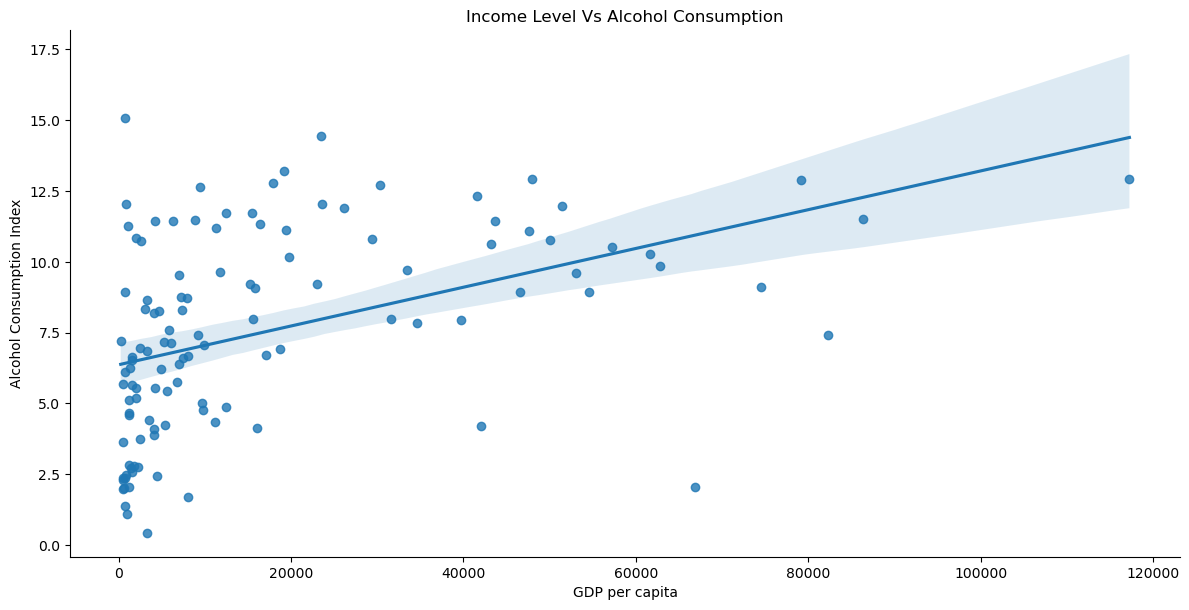

In [14]:
# Check the assumptions

#Linearity

sns.lmplot(x='GDP_per_capita',y='ACI_Total',data = data,aspect=2,height=6)
plt.xlabel('GDP per capita')
plt.ylabel('Alcohol Consumption Index')
plt.title('Income Level Vs Alcohol Consumption');

plt.savefig('myimage.png', format='png', dpi=1200)

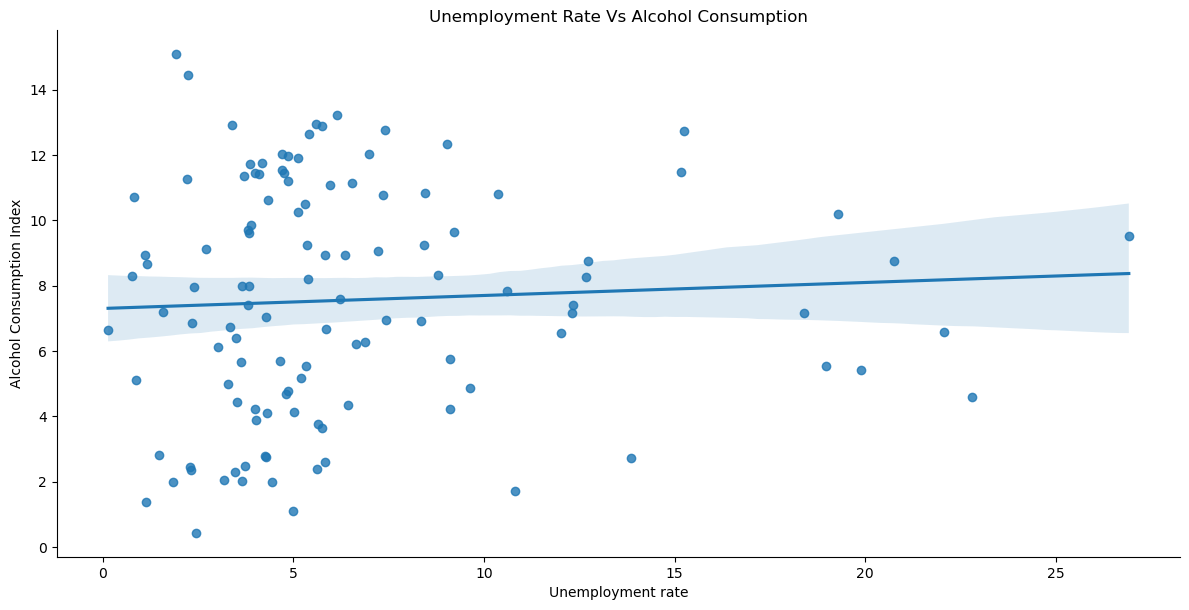

In [15]:
sns.lmplot(x='Unemployment_total',y='ACI_Total',data = data,aspect=2,height=6)
plt.xlabel('Unemployment rate')
plt.ylabel('Alcohol Consumption Index')
plt.title('Unemployment Rate Vs Alcohol Consumption');

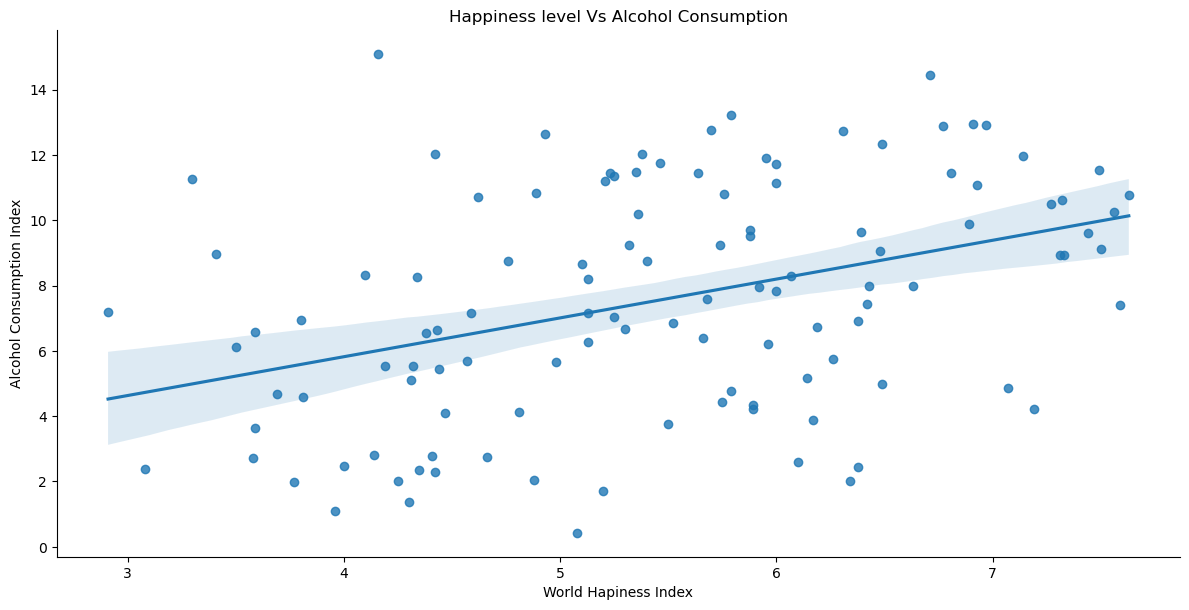

In [16]:
sns.lmplot(x='WHI',y='ACI_Total',data = data,aspect=2,height=6)
plt.xlabel('World Hapiness Index')
plt.ylabel('Alcohol Consumption Index')
plt.title('Happiness level Vs Alcohol Consumption');

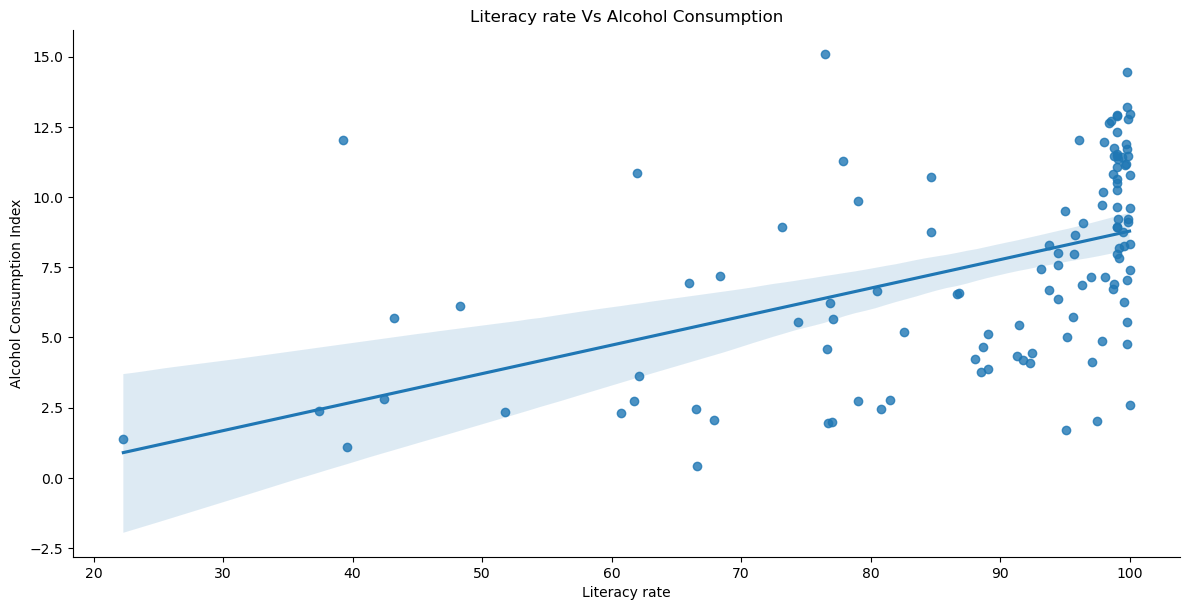

In [17]:
sns.lmplot(x='Literacy_total',y='ACI_Total',data = data,aspect=2,height=6)
plt.xlabel('Literacy rate')
plt.ylabel('Alcohol Consumption Index')
plt.title('Literacy rate Vs Alcohol Consumption');

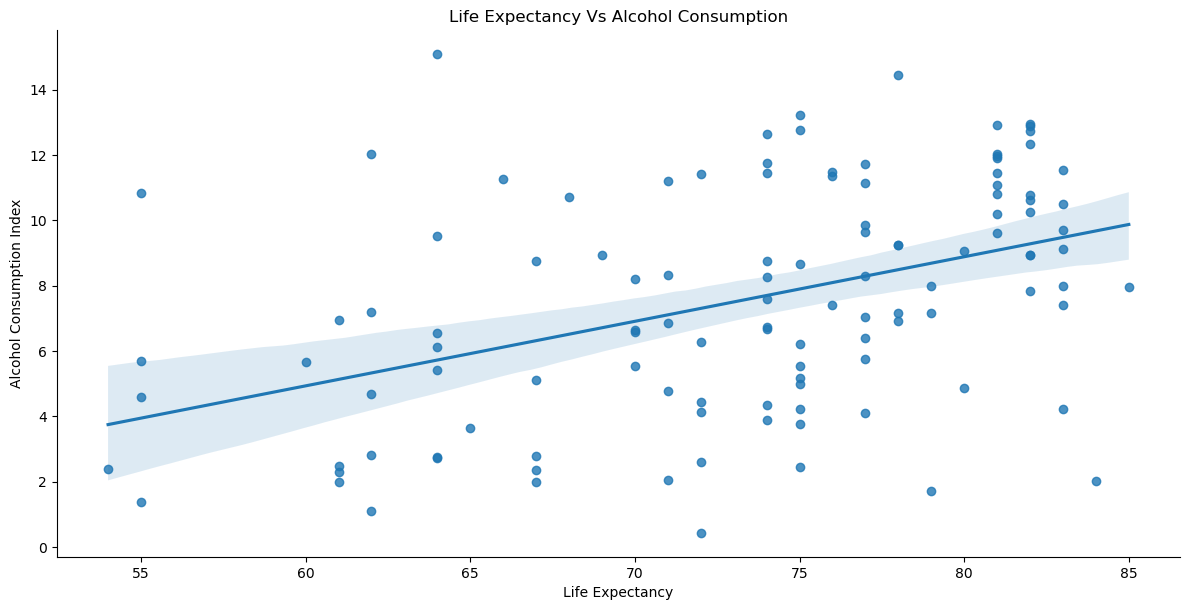

In [18]:
sns.lmplot(x='Life_expectancy',y='ACI_Total',data = data,aspect=2,height=6)
plt.xlabel('Life Expectancy')
plt.ylabel('Alcohol Consumption Index')
plt.title('Life Expectancy Vs Alcohol Consumption');

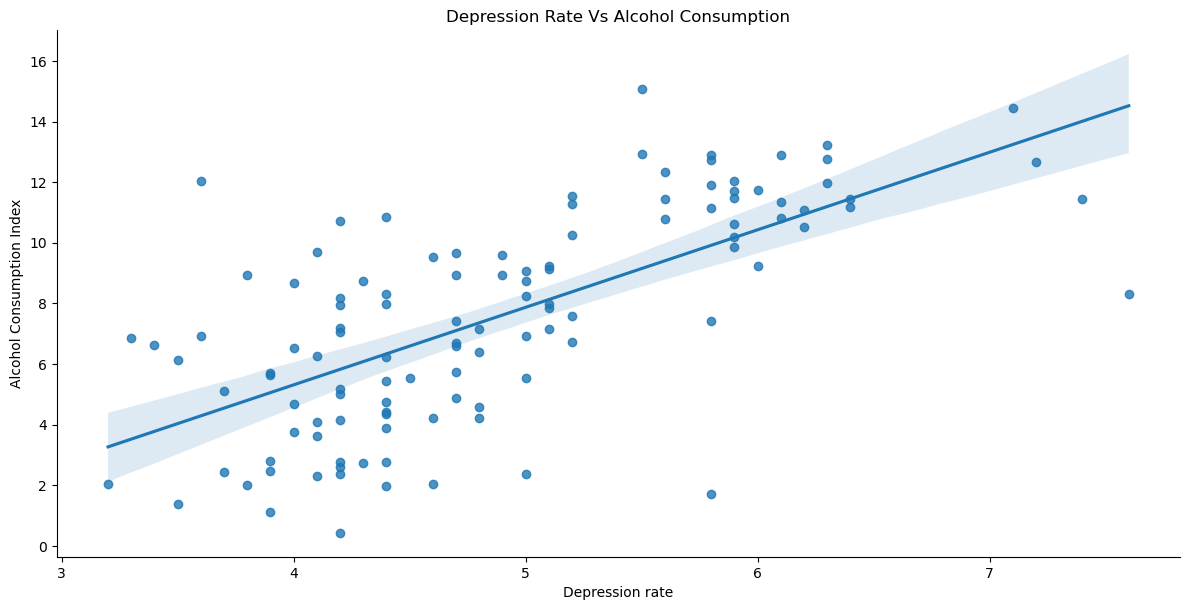

In [19]:
sns.lmplot(x='Depression_rate',y='ACI_Total',data = data,aspect=2,height=6)
plt.xlabel('Depression rate')
plt.ylabel('Alcohol Consumption Index')
plt.title('Depression Rate Vs Alcohol Consumption');

/Users/polinakuznichenko/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'Distribution of Alcohol Consumption')

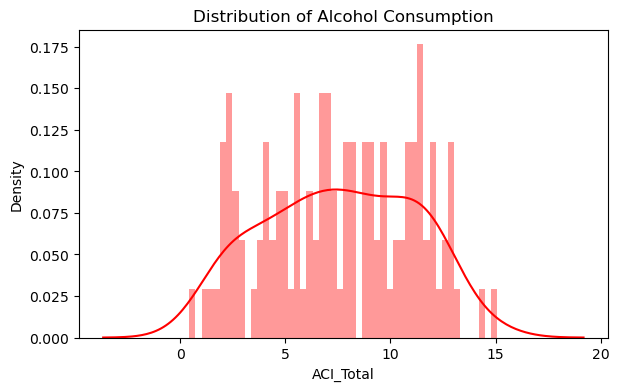

In [20]:
# Distribution of data

f= plt.figure(figsize=(15,4))

ax=f.add_subplot(121)
sns.distplot(data['ACI_Total'],bins=50,color='r',ax=ax)
ax.set_title('Distribution of Alcohol Consumption')

/Users/polinakuznichenko/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'Distribution of Income')

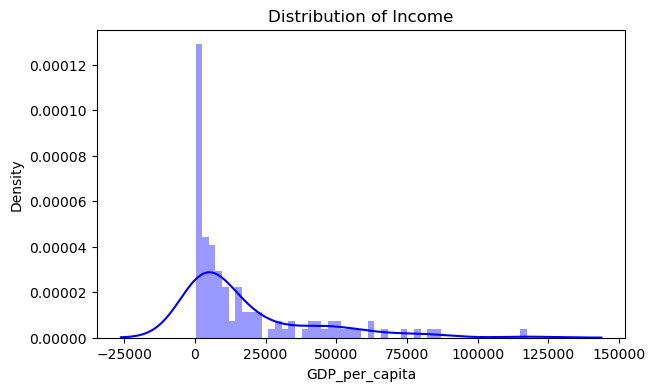

In [21]:
f= plt.figure(figsize=(15,4))

ax=f.add_subplot(121)
sns.distplot(data['GDP_per_capita'],bins=50,color='b',ax=ax)
ax.set_title('Distribution of Income')


/Users/polinakuznichenko/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'Distribution of Unemplyment level')

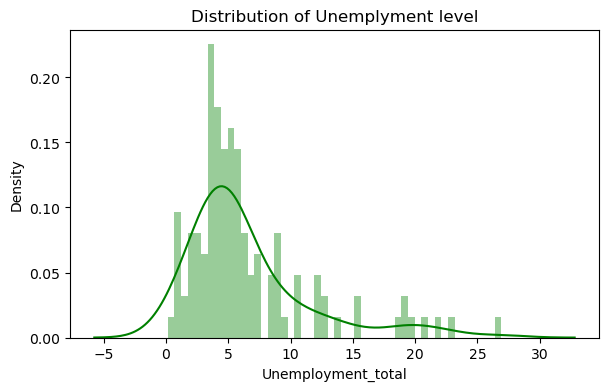

In [22]:
f= plt.figure(figsize=(15,4))

ax=f.add_subplot(121)
sns.distplot(data['Unemployment_total'],bins=50,color='g',ax=ax)
ax.set_title('Distribution of Unemplyment level')

/Users/polinakuznichenko/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'Distribution of Happiness level')

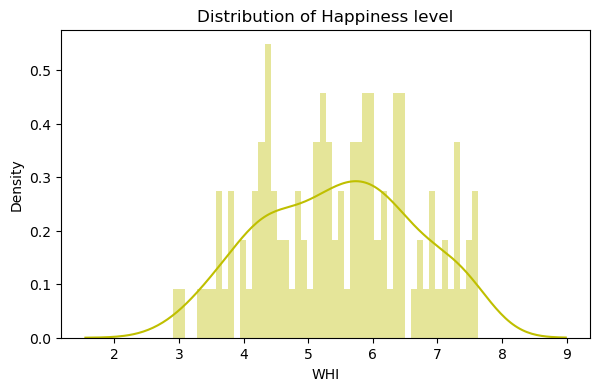

In [23]:
f= plt.figure(figsize=(15,4))

ax=f.add_subplot(121)
sns.distplot(data['WHI'],bins=50,color='y',ax=ax)
ax.set_title('Distribution of Happiness level')

/Users/polinakuznichenko/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'Distribution of Literacy level')

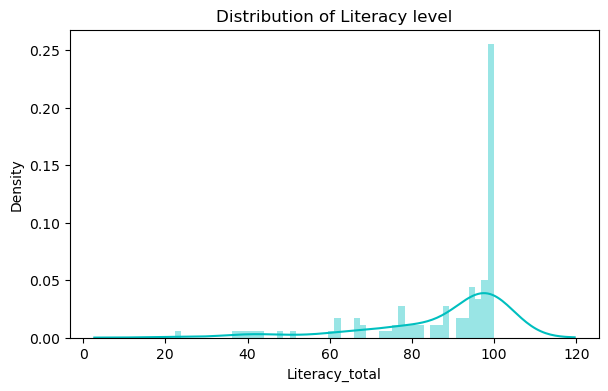

In [24]:
f= plt.figure(figsize=(15,4))

ax=f.add_subplot(121)
sns.distplot(data['Literacy_total'],bins=50,color='c',ax=ax)
ax.set_title('Distribution of Literacy level')

/Users/polinakuznichenko/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'Distribution of Life expactancy')

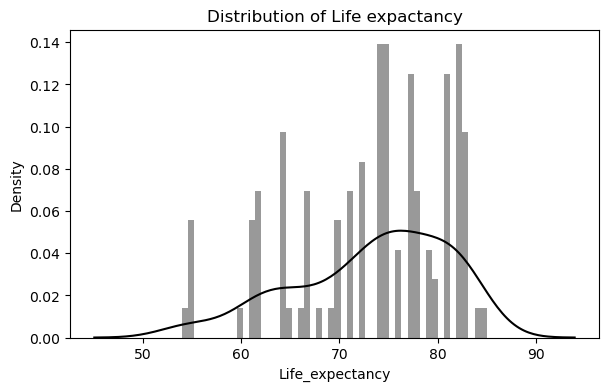

In [25]:
f= plt.figure(figsize=(15,4))

ax=f.add_subplot(121)
sns.distplot(data['Life_expectancy'],bins=50,color='k',ax=ax)
ax.set_title('Distribution of Life expactancy')

/Users/polinakuznichenko/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'Distribution of Depression level')

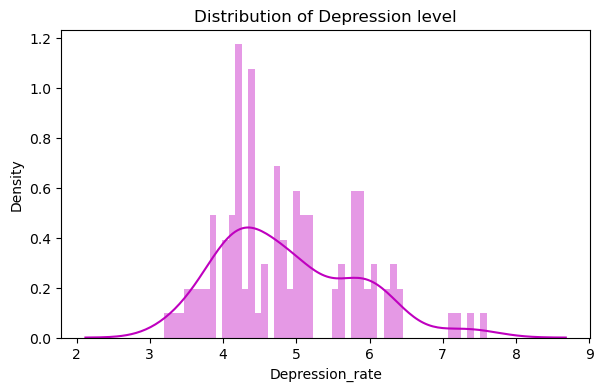

In [26]:
f= plt.figure(figsize=(15,4))

ax=f.add_subplot(121)
sns.distplot(data['Depression_rate'],bins=50,color='m',ax=ax)
ax.set_title('Distribution of Depression level')